# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

Name: Basmah Tarek

ID: 49-6032

Tutorial: T01




## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [168]:
df.describe() 
df.describe(include= 'object')

from sklearn.preprocessing import LabelEncoder 
df_encoded = df.copy()  
 
#label encode "make" feature:
make_le = LabelEncoder()
df_encoded['make'] = make_le.fit_transform(df['make'])
 
#label encode "model" feature:
model_le = LabelEncoder()
df_encoded['model'] = model_le.fit_transform(df['model'])
 
#label encode "trim" feature:
trim_le = LabelEncoder()
df_encoded['trim'] = trim_le.fit_transform(df['trim'])
 
# label encode 'body' feature
body_le = LabelEncoder()
df_encoded['body'] = body_le.fit_transform(df['body'])
 
# label encode 'transmission' feature
transmission_le = LabelEncoder()
df_encoded['transmission'] = transmission_le.fit_transform(df['transmission'])
 
# label encode 'vin' feature
vin_le = LabelEncoder()
df_encoded['vin'] = vin_le.fit_transform(df['vin'])
 
# label encode 'state' feature
state_le = LabelEncoder()
df_encoded['state'] = state_le.fit_transform(df['state']) 
 
# label encode 'odometer' feature
odometer_le = LabelEncoder()
df_encoded['odometer'] = odometer_le.fit_transform(df['odometer'])
 
# label encode 'color' feature
color_le = LabelEncoder()
df_encoded['color'] = color_le.fit_transform(df['color'])
 
# label encode 'interior' feature
interior_le = LabelEncoder()
df_encoded['interior'] = interior_le.fit_transform(df['interior'])
 
# label encode 'seller' feature
seller_le = LabelEncoder()
df_encoded['seller'] = seller_le.fit_transform(df['seller'])
 
# label encode 'mmr' feature
mmr_le = LabelEncoder()
df_encoded['mmr'] = mmr_le.fit_transform(df['mmr'])
 
# label encode 'sellingprice' feature
sellingprice_le = LabelEncoder()
df_encoded['sellingprice'] = sellingprice_le.fit_transform(df['sellingprice'])
 
# label encode 'saledate' feature
saledate_le = LabelEncoder()
df_encoded['saledate'] = saledate_le.fit_transform(df['saledate'])
 
#getting df information:
df.info()
 
#getting missing values:
df['year'] = df['year'].replace("_", np.nan)
df['make'] = df['make'].replace("_", np.nan)
df['model'] = df['model'].replace("_", np.nan)
df['trim'] = df['trim'].replace("_", np.nan)
df['body'] = df['body'].replace("_", np.nan)
df['transmission'] = df['transmission'].replace("_", np.nan)
df['vin'] = df['vin'].replace("_", np.nan)
df['state'] = df['state'].replace("_", np.nan)
df['condition'] = df['condition'].replace("_", np.nan)
df['odometer'] = df['odometer'].replace("_", np.nan)
df['color'] = df['color'].replace("_", np.nan)
df['interior'] = df['interior'].replace("_", np.nan)
df['seller'] = df['seller'].replace("_", np.nan)
df['mmr'] = df['mmr'].replace("_", np.nan)
df['sellingprice'] = df['sellingprice'].replace("_", np.nan)
df['saledate'] = df['saledate'].replace("_", np.nan)
df.isna().sum() 
 
#calculating the matrix for numerical values:
corr = df_encoded.corr()
corr 
 
df.describe()
df.columns
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  int64  
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 5.7+ MB


(46578, 16)

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [153]:
df.isna().sum()
df.isnull().sum(axis=1)
missing = df.isnull().sum(axis=1) > 0
missing
df[missing]
df.head()










,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [154]:
df['color'] = df['color'].fillna(df['color'].mode()[0])
df['interior'] = df['interior'].fillna(df['interior'].mode()[0])
df[missing].head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


In [171]:
df = df.set_index('interior')
df.isnull().head()
df.isnull().sum(axis=1)
missing = df.isnull().sum(axis=1) > 0
missing
df.columns



Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'seller', 'mmr', 'sellingprice',
       'saledate'],
      dtype='object')

In [175]:
df['odometer'] = df['odometer'].str.extract('(\d+)').astype(int)
df


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [176]:
df['mmr'] = df['mmr'].str.extract('(\d+)').astype(int)
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,—,award auto sales and leasing inc,28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844,—,gray,wheels exchange llc,15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185,black,black,nissan infiniti lt,19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357,white,beige,motorcars of south texas,22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376,black,beige,avis rac/san leandro,13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [177]:
df['sellingprice'] = df['sellingprice'].str.extract('(\d+)').astype(int)
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,—,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844,—,gray,wheels exchange llc,15650,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185,black,black,nissan infiniti lt,19350,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357,white,beige,motorcars of south texas,22200,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376,black,beige,avis rac/san leandro,13400,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [178]:
df['vin'] = df['vin'].str.extract('(\d+)').astype(int)
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,5,fl,4.9,17846,gray,—,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,5,fl,4.1,21122,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5,fl,1.9,145303,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1,wa,4.9,6714,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2,va,3.5,52844,—,gray,wheels exchange llc,15650,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,1,ca,4.5,23185,black,black,nissan infiniti lt,19350,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,3,tx,4.2,45357,white,beige,motorcars of south texas,22200,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4,ca,3.5,43376,black,beige,avis rac/san leandro,13400,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [72]:
from pandas.core.dtypes.cast import convert_dtypes
df['interior'] = df['interior'].replace("_", np.nan)
df['color'] = df['interior'].replace("_", np.nan)
df['interior'] = df['interior'].fillna(df['interior'].mode()[0])
df['color'] = df['color'].fillna(df['color'].mode()[0])
df['sellingprice'] = df['sellingprice'].str.replace("$", "")
df['sellingprice'] = df['sellingprice'].astype(object).astype(float)
df['mmr'] = df['mmr'].str.replace("$", "")
df['mmr'] = df['mmr'].astype(object).astype(float) 
df["odometer"] = df["odometer"].str.replace("mi","")
df["odometer"] = df["odometer"].astype(object).astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<AxesSubplot: xlabel='color', ylabel='count'>

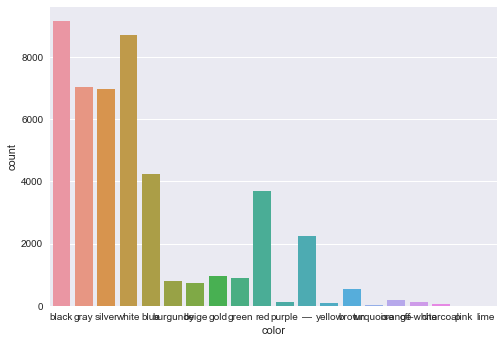

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

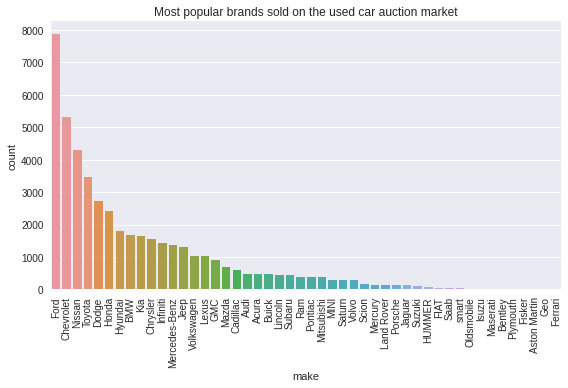

In [182]:
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular brands sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: Ford is the most popular, followed by Chevrolet and Nissan.


**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

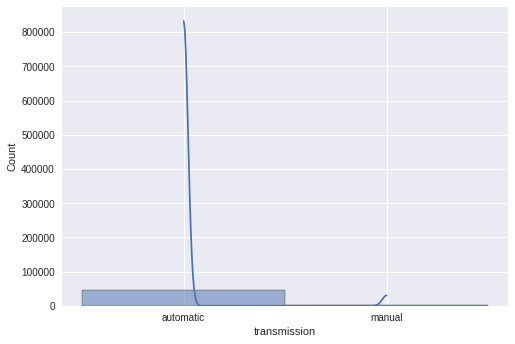

In [208]:
sns.histplot(df['transmission'], kde=True);

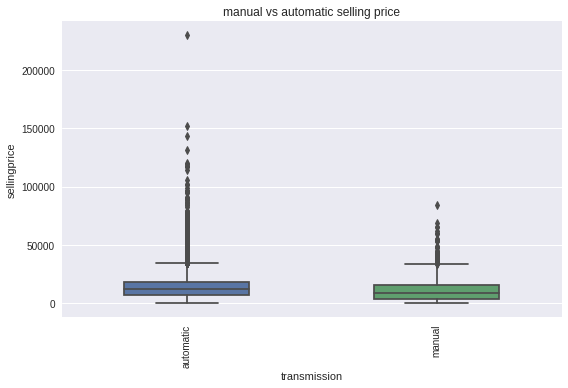

In [6]:
sns.boxplot(data= df, y = 'sellingprice', x = 'transmission', width = 0.5).set(title = 'manual vs automatic selling price')
plt.xticks(rotation=90)
plt.tight_layout()

[link text](https://)**Answer for Q2**: According to the visualization, yes they do.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

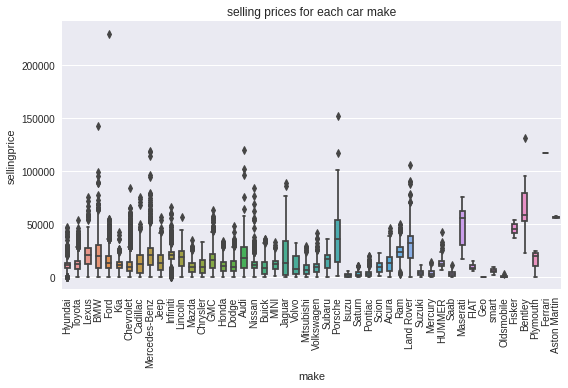

In [5]:
sns.boxplot(data= df, y = 'sellingprice', x = 'make', width = 0.5).set(title = 'selling prices for each car make')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q3**: BMW,Audi, Jaguar, Porsche, and Maserati have the widest distribution of selling prices. Porsche and Maserati are the most expensive two.



**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000.]), <a list of 8 Text major ticklabel objects>)

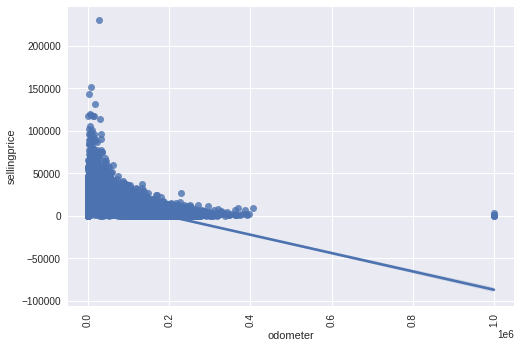

In [40]:
sns.regplot(x= "odometer", y="sellingprice", data =df)
plt.xticks(rotation=90)

[link text](https:// [link text](https://))**Answer for Q4**: Negatively correlation relationship between odometer and sellingprice. 

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 11 Text major ticklabel objects>)

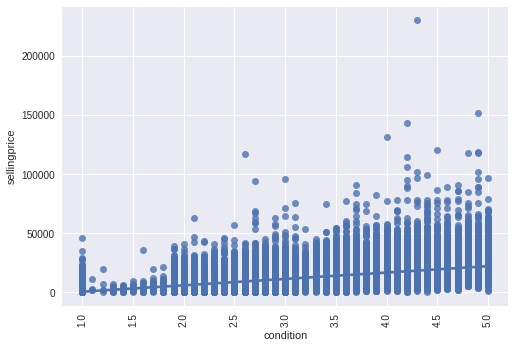

In [41]:
sns.regplot(x= "condition", y="sellingprice", data = df)
plt.xticks(rotation=90)

**Answer for Q5**: Positively increasing correlation, but in a very slow manner.

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]), <a list of 71 Text major ticklabel objects>)

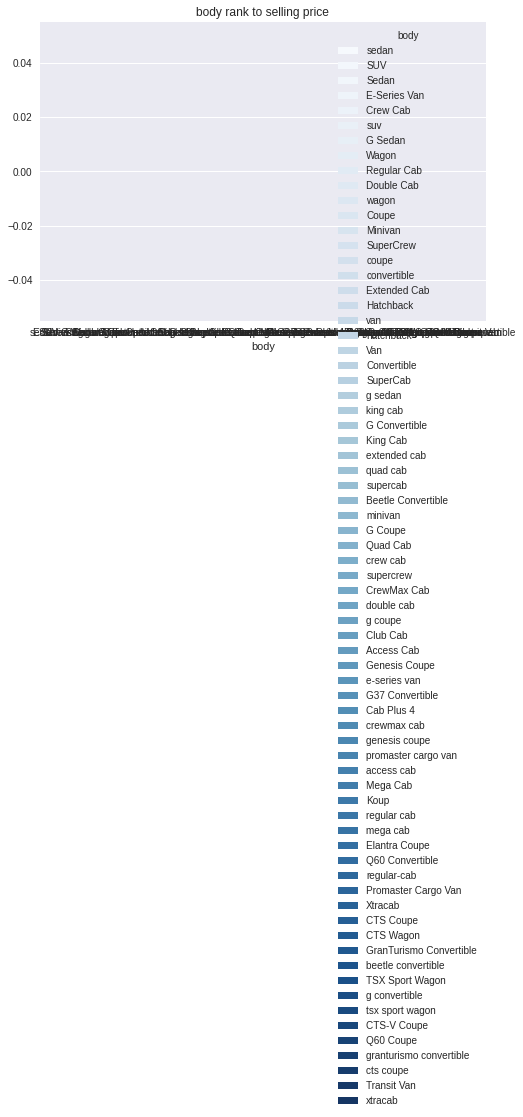

In [115]:
sns.barplot(data= df, x = "body", y = df[['sellingprice']].mean(axis=1), palette = "Blues", hue ="body", estimator = df.median).set(title = 'body rank to selling price')
plt.xticks(rotation=360)



**Answer for Q6**: Your answer here

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [42]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# label encode 'body' feature
body_le = LabelEncoder()
df_encoded['body'] = body_le.fit_transform(df['body'])

# label encode 'odometer' feature
odometer_le = LabelEncoder()
df_encoded['odometer'] = odometer_le.fit_transform(df['odometer'])



## Modelling

_Apply the linear regression model below._

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_encoded.drop('model',axis=1)
y = df_encoded['model']


lin_reg = LinearRegression()
lin_reg.fit(X, y);

ValueError: ignored

## Model Evaluation

_Evaluate the model you applied._

In [44]:
lin_reg.score(X_test, y_test)

ValueError: ignored

## Model Validation (Optional)

_Check if the model you applied meets the necessary assumptions for the chosen model._

NameError: ignored

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.